In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt


In [4]:
### list of parameters
t_window = 8000e-15  # total time window [s]
ev_window = 500e-3   # total energy window [eV]
sigT = 100e-15/2.355
f1_list = np.linspace(12,8,5)

# I/O
dir_output = 'output/'
dir_case = dir_output+'f1_scan/'
dir_param = dir_case+'{}fs/'.format(round(sigT*2.355*1e15,2))
dir_plot = dir_param+'{}fs_{}meV/'.format(round(t_window*1e15,1),round(ev_window*1e3,1))


In [10]:
### read diagnostics data
f1 = []
dur_out = []
ptilt_x_out = []
ptilt_y_out = []
bw_out = []
axis_ev_in = []
axis_ev_out = []
int_ev_in = []
int_ev_out = []
centE_out = []

with h5py.File(dir_plot+'loop_f1_{}-{}m.h5'.format(f1_list.min(), f1_list.max()), 'r') as f:
    for irep in range(len(f1_list)):
        f1.append(f['rep_{}/f1'.format(irep)][0])
        dur_out.append(f['rep_{}/duration'.format(irep)][0])
        ptilt_x_out.append(f['rep_{}/tilt_x'.format(irep)][0])
        ptilt_y_out.append(f['rep_{}/tilt_y'.format(irep)][0])
        bw_out.append(f['rep_{}/bandwidth'.format(irep)][0])
        axis_ev_in.append(f['rep_{}/axis_ev_in'.format(irep)][:])
        axis_ev_out.append(f['rep_{}/axis_ev_out'.format(irep)][:])
        int_ev_in.append(f['rep_{}/int_ev_in'.format(irep)][:])
        int_ev_out.append(f['rep_{}/int_ev_out'.format(irep)][:])
        centE_out.append(f['rep_{}/central_energy'.format(irep)][0])

f1 = np.asarray(f1)
dur_out = np.asarray(dur_out)
ptilt_x_out = np.asarray(ptilt_x_out)
ptilt_y_out = np.asarray(ptilt_y_out)
bw_out = np.asarray(bw_out)*1e3
axis_ev_in = np.asarray(axis_ev_in)
axis_ev_out = np.asarray(axis_ev_out)
int_ev_in = np.asarray(int_ev_in)
int_ev_out = np.asarray(int_ev_out)
centE_in = axis_ev_in[-1][np.argmax(int_ev_in[-1])]
centE_out = np.asarray(centE_out)
centE_out = (centE_out - centE_in)*1e3

In [27]:
data = []
for i in range(5):
    if i < 3:
        data.append(bw_out[i][1])
    else:
        data.append(bw_out[i])

data = np.asarray(data)

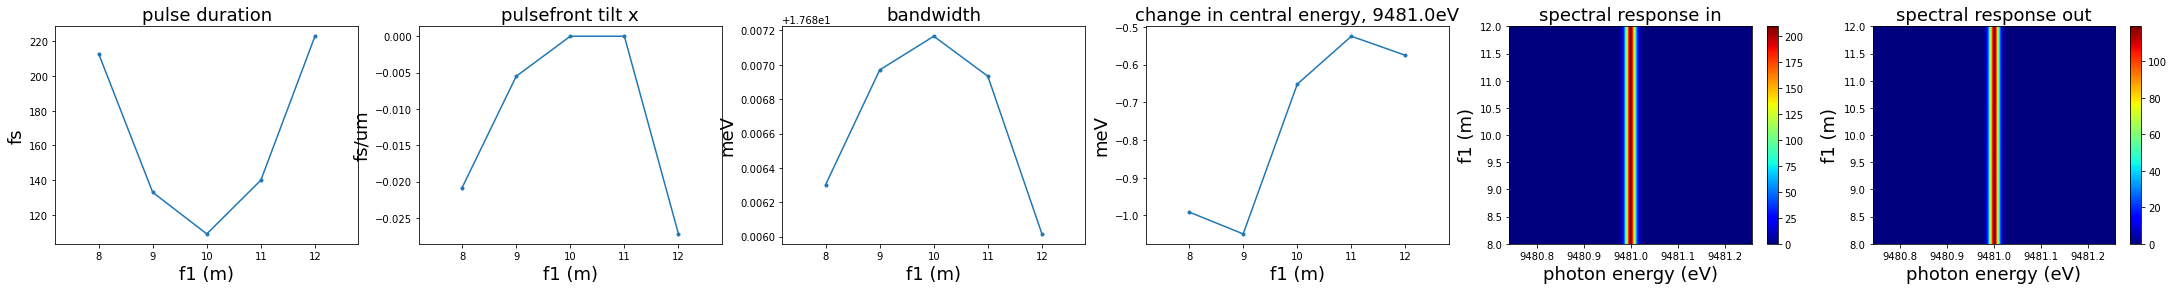

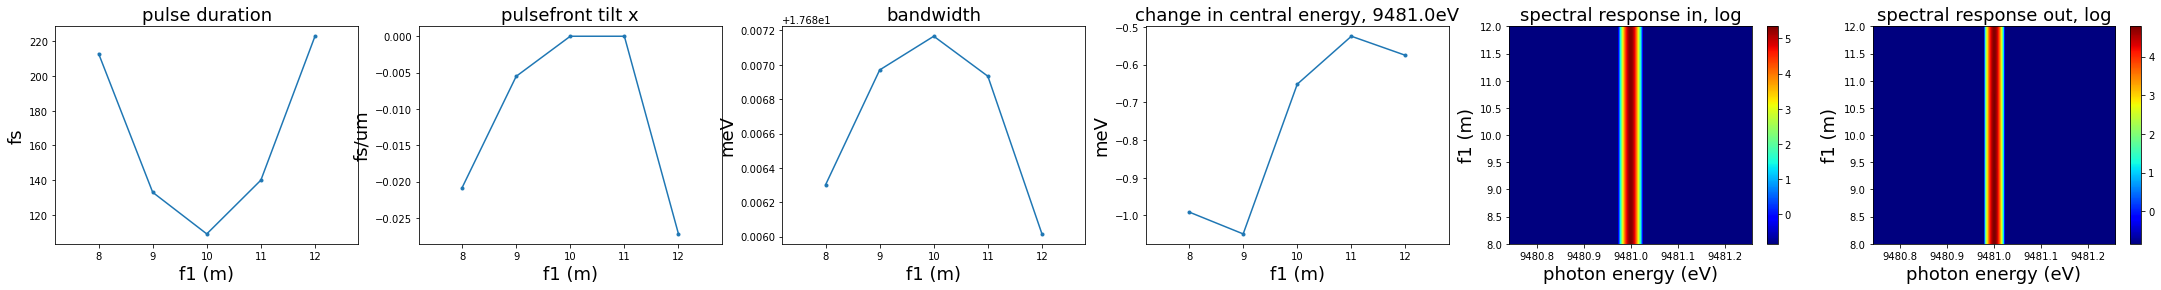

In [28]:
### plots
# diagnostic_data = [dur_out, ptilt_x_out, bw_out*1e3, centE_out]
diagnostic_data = [dur_out, ptilt_x_out, data, centE_out]
titles = ['pulse duration', 'pulsefront tilt x', 'bandwidth', 'change in central energy, {}eV'.format(centE_in)]
ylabels = ['fs', 'fs/um', 'meV', 'meV']

images = [int_ev_in, int_ev_out]
image_x = [axis_ev_in[0], axis_ev_out[0]]
image_titles = ['spectral response in', 'spectral response out']
#if_log = 1

for if_log in [0,1]:


    Nplots = len(titles)+len(images)
    plt.figure(figsize=(int(6*Nplots)+2,4))
    for i in range(len(titles)):
        plt.subplot(1,Nplots,i+1)
        index = (diagnostic_data[i]<1e30)
        plt.plot(f1[index], diagnostic_data[i][index], '.-')
        plt.xlabel('f1 (m)', fontsize=18)
        plt.xlim([f1.min()*0.9, f1.max()+f1.min()*0.1])
        plt.ylabel(ylabels[i], fontsize=18)
        plt.title(titles[i], fontsize=18)

    for i in range(len(images)):
        image = images[i]
        x = image_x[i]
        title = image_titles[i]
        plt.subplot(1,Nplots, len(titles)+i+1)
        if if_log == 1:
            plt.imshow(np.log(image), cmap='jet',
                       extent = [x.min(), x.max(), f1[-1], f1[0]])
            plt.clim(np.log(image_x).max()-10)
            title = title+', log'
        else:
            plt.imshow(image, cmap='jet',
                       extent = [x.min(), x.max(), f1[-1], f1[0]])
        plt.xlabel('photon energy (eV)', fontsize=18)
        plt.ylabel('f1 (m)', fontsize=18)
        plt.title(title, fontsize=18)
        plt.axis('tight')
        plt.colorbar()

    if if_log == 1:
        plt.savefig(dir_plot+'f1_scan_{}-{}m_open_log.png'.format(f1.min(), f1.max()))
    else:
        plt.savefig(dir_plot+'f1_scan_{}-{}m_open.png'.format(f1.min(), f1.max()))

In [ ]:
diagnostic_data[i]

In [ ]:
plt.close('all')

In [ ]:
np.deg2rad(5)